# Introduction to Altair: Single View Plots (1/3)

[Altair](https://altair-viz.github.io/) is a declarative statistical visualization library for Python. Altair offers a powerful and concise visualization grammar for quickly building a wide range of statistical graphics.

By *declarative*, we mean that you can provide a high-level specification of *what* you want the visualization to include, in terms of *data*, *graphical marks*, and *encoding channels*, rather than having to specify *how* to implement the visualization in terms of for-loops, low-level drawing commands, *etc*. 

The key idea is that you declare links between data fields and visual encoding channels, such as the x-axis, y-axis, color, *etc*. The rest of the plot details are handled automatically. Building on this declarative plotting idea, a surprising range of simple to sophisticated visualizations can be created using a concise grammar.

Altair is based on [Vega-Lite](https://vega.github.io/vega-lite/), a high-level grammar of interactive graphics. Altair provides a friendly Python [API (Application Programming Interface)](https://en.wikipedia.org/wiki/Application_programming_interface) that generates Vega-Lite specifications in [JSON (JavaScript Object Notation)](https://en.wikipedia.org/wiki/JSON) format. Environments such as Jupyter Notebooks, JupyterLab, and Colab can then take this specification and render it directly in the web browser.

This notebook will guide you through the basic process of creating visualizations in Altair. First, you will need to make sure you have the Altair package and its dependencies installed (for more, see the [Altair installation documentation](https://altair-viz.github.io/getting_started/installation.html)), or you are using a notebook environment that includes the dependencies pre-installed.

_This notebook is part of [the Vega-Lite + Altair Workshop at ODSC West 2019](https://odsc.com/training/portfolio/title-coming-soon-46/)._

_Acknowledgement:_ This series  of notebook-based workshop is an adaption from the University of Washington's [Data Visualization Curriculum](https://github.com/uwdata/visualization-curriculum), with examples from the [Vega-Lite presentation video from OpenVisConf 2017](https://www.youtube.com/watch?v=9uaHRWj04D4) for a short workshop (60-90 minutes).

## Imports

To start, we must import the necessary libraries: Pandas for data frames and Altair for visualization.

In [1]:
import pandas as pd
import altair as alt

## Renderers

Depending on your programming environment, you may need to specify a particular [renderer](https://altair-viz.github.io/user_guide/renderers.html) for Altair.

* If you are using __JupyterLab__, __Google Colab__, or __nteract__ you should not need to do anything (the correct renderer will be enabled by default).
* If you are using __Jupyter Notebook__, you need to enable the notebook renderer (below). If this command fails with a "`Value Error: to use the 'notebook' renderer...`", you may need to revert to an older version of vega (the current release v2.0.* is for the upcoming Altair v3.0): "`conda install -c conda-forge vega=1.3`" or "`pip install vega==1.3`" (full context [here](https://github.com/altair-viz/altair/issues/1114)).


In [2]:
# use this line if you are in a Jupyter Notebook (not JupyterLab) environment
# alt.renderers.enable('notebook')

# Altair: Single-View Visualization

## Data

When using Altair, datasets are most commonly provided as a Pandas data frame, which consists of a set of named data *columns*. We will also regularly refer to data columns as data *fields*. As we will see, the named columns of the data frame are an essential piece of plotting with Altair.

As Vega-Lite and Altair were originally developed in Seattle, we will use the famous Seattle weather dataset as our first demo dataset in this tutorial.

In [24]:
df = pd.read_csv('seattle-weather.csv')

Let's look at the header of the file so see how the data looks like:

In [4]:
# df.head()

## The Chart Object

The fundamental object in Altair is the `Chart`, which takes a data frame as a single argument:

In [5]:
chart = alt.Chart(df)

So far, we have defined the `Chart` object and passed it the simple data frame we generated above. We have not yet told the chart to *do* anything with the data.

## Marks and Encodings

With a chart object in hand, we can now specify how we would like the data to be visualized. We first indicate what kind of graphical *mark* (geometric shape) we want to use to represent the data. We can set the `mark` attribute of the chart object using the the `Chart.mark_*` methods.

For example, we can show the data as a point using `alt.Chart(df).mark_point()`:

Here the rendering consists of one point per row in the dataset, all plotted on top of each other, since we have not yet specified positions for these points.

To visually separate the points, we can map various encoding channels, or channels for short, to fields in the dataset using the `encode()` method.  

For example, we can map x to "temperature" by calling `.encode(x="temperature")`.

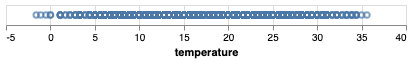

In [6]:
alt.Chart(df).mark_point().encode(x="temperature")

The encode() method builds a key-value mapping between encoding channels (such as x, y, color, shape, size, etc.) to fields (or columns) in the dataset, accessed by field name. 

Let's try change to tick mark to make a _strip plot_ which would have less occlusion between marks. 

In [8]:
# Modify:
# alt.Chart(df).mark_point().encode(x="temperature")


Note that for Pandas data frames, Altair automatically determines an appropriate data type for the mapped column. In this case, `temperature` is a quantitative field.

We can also explicitly specify type by using the ":Q" shortcut:

or by using a full form encoding method (`alt.X()`)

We can use the type to explicitly cast type as well:

## Sensible Default: Scales and Axes

Behind the scenes, the Vega-Lite compiler resolves ambiguity about low level details such as scales and axes with reasonable defaults. Omitting these details allows concise specifications.

For example, the code above automatically generates the scale and axis for the x-encoding as if we write the following code: 

```python
alt.Chart(df).mark_tick().encode(
  x=alt.X("temperature", 
    scale=alt.Scale(type="linear", domain=[-5,40], ...),
    axis=alt.Axis(title="temperature", grid=True, ...)
  )
)
```

We can explicitly override these properties to customize our chart.  For example, try setting scale domain to `[-10,50]`. 


In [9]:
# Modify: alt.Chart(df).mark_tick().encode(x=alt.X("temperature"))



## Transformation: Bar Chart Showing Mean Temperature for each Weather Type

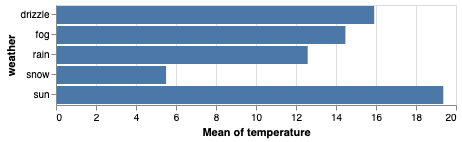

In [10]:
alt.Chart(df).mark_bar().encode(x=alt.X("mean(temperature)"), y="weather")

In [11]:
# Modify: alt.Chart(df).mark_tick().encode(x=alt.X("temperature"))



## Transformation: Sorting

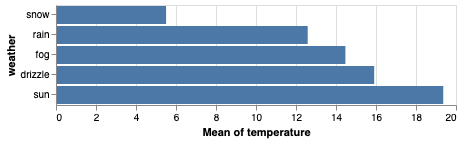

In [25]:
alt.Chart(df).mark_bar().encode(x=alt.X("mean(temperature)"), y=alt.Y("weather", sort=alt.SortByEncoding("x")))

To sort the weather type by the mean of temperature,  we can add `sort=alt.EncodingSortField(op="mean", field="temperature")`:




## Transformation: Histogram = (Bar with x=binned field, y=count)



Back to the strip plot:

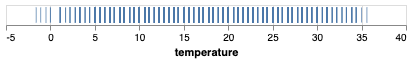

In [13]:
alt.Chart(df).mark_tick().encode(x=alt.X('temperature'))

It's still a bit hard to see how many data points has each value of temperature.  We can instead make a histogram like this one:

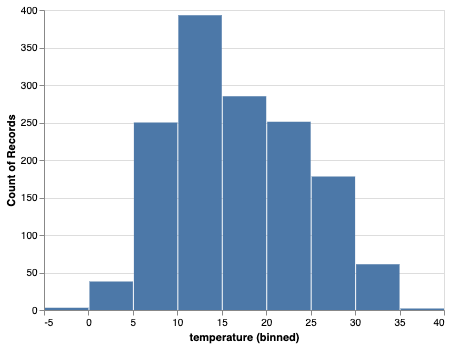

In [14]:
alt.Chart(df).mark_bar().encode(x=alt.X('temperature', bin=True),y='count()')

To do so, We can add `bin=True` to `x` and then add `y="count()"`.   Finally, we change the mark to `mark_bar()` instead.



In [15]:
# Modify:

# alt.Chart(df).mark_tick().encode(x=alt.X('temperature'))

# 2D Histogram

Having a grammar allows us to understand the underlying structure of a graphic.
In addition, we can incrementally customize the chart.

For example, we can instead map `wind` to `y` and `bin` it and map `size` to `count()` to make circle-based 2D histogram.

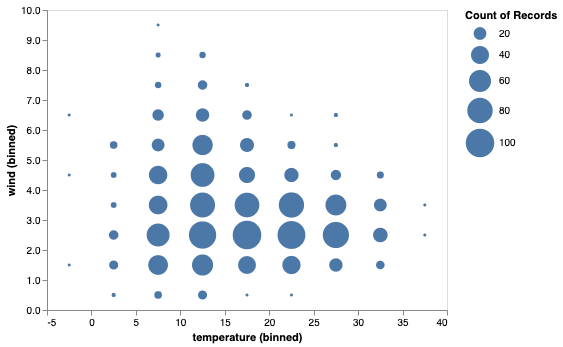

In [16]:
alt.Chart(df).mark_circle().encode(
    x=alt.X('temperature', bin=True),
    y=alt.Y('wind', bin=True),
    size='count()'
)

Alternatively, we can change the mark to `mark_rect` and map `count()` to `color` to make a 2D histogram heatmap instead. 

## Incremental Encoding: Stacked Histogram

Instead of making a histogram we can map `color="weather"`:

In [17]:
# Modify: 
# alt.Chart(df).mark_bar().encode(
#     x=alt.X('temperature', bin=True), 
#     y="count()"
#)

Now we get a histogram that shows us what the dominant weather on days with a particular temperature was.

Note that Altair automatically stacks the bars when we add color, as not stacking will lead to occlusion like shown below:

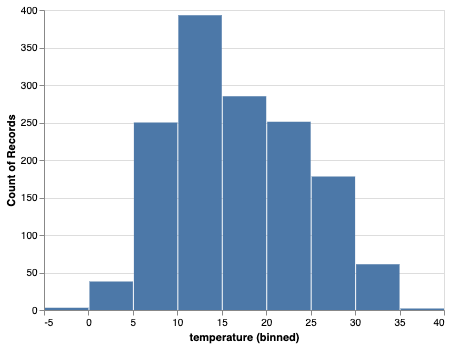

In [18]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('temperature', bin=True), 
    y="count()",

)

## Customization: Color Mapping

But you might think that having sunny day as "green" and foggy day as "orange" might not be the best color encoding.  We can customize the underlying color scale by using the full-form of color encoding method (`alt.Color`) and set custom scale domain and range.


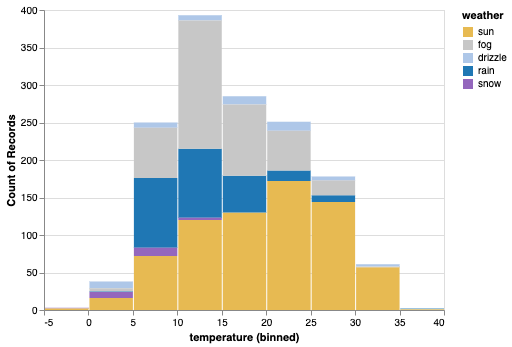

In [19]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('temperature', bin=True), 
    y="count()", 
    color=alt.Color("weather", scale=alt.Scale(
        domain=["sun", "fog", "drizzle", "rain", "snow"],
        range=["#e7ba52", "#c7c7c7", "#aec7e8", "#1f77b4", "#9467bd"]
    ))
)

## Incremental Encoding: Faceted Histogram



The stacked histogram more accurately shows the data than the naive version would.  

However, it is still hard to compare distribution of temperature for different weather types.

We can easily create small multiples using the `row`/`column` encoding, which is a shorthand for a facet operator. 

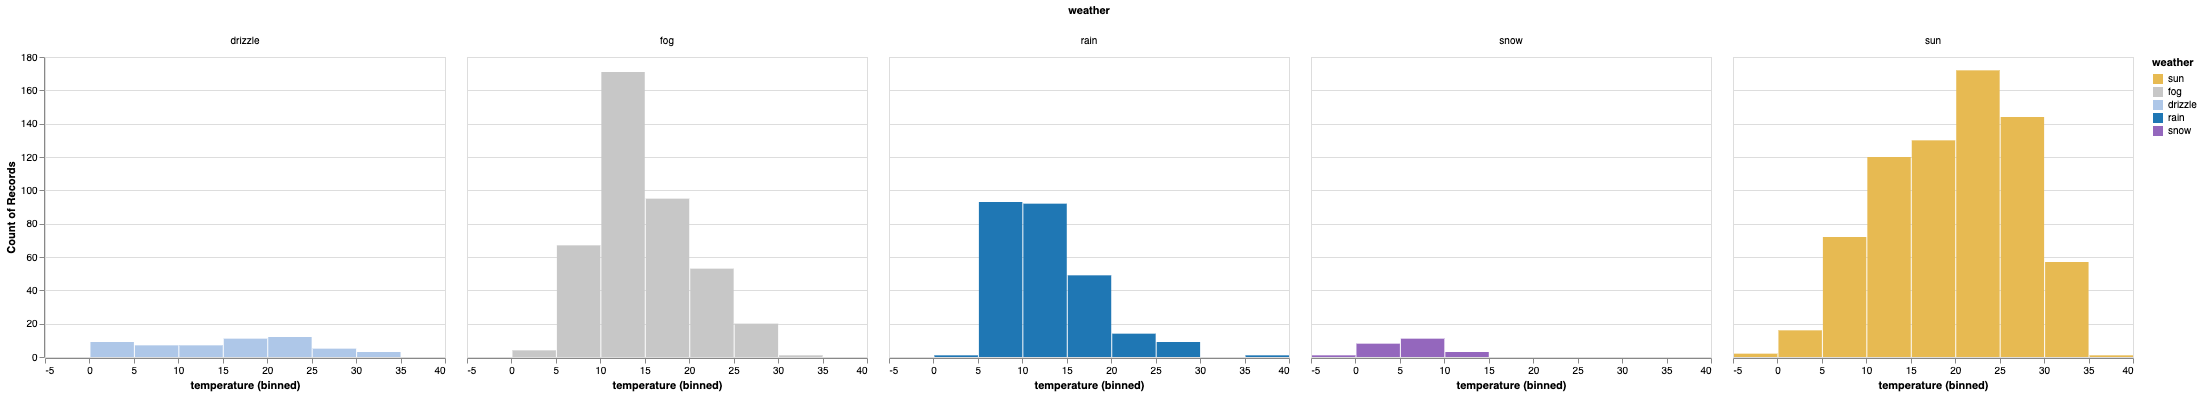

In [20]:
# alt.Chart(df).mark_bar().encode(
#   x=alt.X('temperature', bin=True), 
#   y="count()", 
#   color=alt.Color("weather", scale=alt.Scale(
#     domain=["sun", "fog", "drizzle", "rain", "snow"],
#     range=["#e7ba52", "#c7c7c7", "#aec7e8", "#1f77b4", "#9467bd"]
#   ))
# )

alt.Chart(df).mark_bar().encode(
    x=alt.X('temperature', bin=True), 
    y="count()", 
    color=alt.Color("weather", scale=alt.Scale(
        domain=["sun", "fog", "drizzle", "rain", "snow"],
        range=["#e7ba52", "#c7c7c7", "#aec7e8", "#1f77b4", "#9467bd"]
    )),
    column="weather"
)

We also use the Chart object's `properties` method to add `width` and `height` to the plot (e.g., by adding `.properties(width=125,height=125)`). 

## Aside: Underlying Vega-Lite Specification in JSON Format

As a Python API to Vega-Lite, Altair's main purpose is to convert plot specifications to a JSON string that conforms to the Vega-Lite schema and then render the visualization using Vega and Vega-Lite. 

For example, the tick plot code in Altair:

```python
alt.Chart(df).mark_tick().encode(x=alt.X("temperature"))
```


is equilvalent to the following code in JSON:

```json
{
  "data": {"url": "seattle-weather.csv"}
  "mark": "point"
  "encoding": {
    "x": {
      "field": "temperature",
      "type": "quantitative"
    }
  }
}
```

Using the `Chart.to_json` method, we can inspect the JSON specification that Altair is exporting and sending to Vega-Lite: 

```python
print(alt.Chart(df).mark_point().encode(x="temperature").to_json())
```

(Note that the output is a bit long as Altair uses embed the data in the data frame as inline data in output Vega specification.)


## Aside: Publishing a Visualization

Once you have visualized your data, perhaps you would like to publish it somewhere on the web. This can be done straightforwardly using the [vega-embed JavaScript package](https://github.com/vega/vega-embed). A simple example of a stand-alone HTML document can be generated for any chart using the `Chart.save` method:

```python
chart = alt.Chart(df).mark_tick().encode(x=alt.X("temperature"))
chart.save('chart.html')
```


The basic HTML template produces output that looks like this, where the JSON specification for your plot produced by `Chart.to_json` should be stored in the `spec` JavaScript variable:

```html
<!DOCTYPE html>
<html>
  <head>
    <script src="https://cdn.jsdelivr.net/npm/vega@4"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-lite@2.6.0"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-embed@3"></script>
  </head>
  <body>
    <div id="vis"></div>
    <script type="text/javascript">
    var spec = {};  /* JSON output for your chart's specification */
    var opt = {"renderer": "canvas", "actions": false};  /* Options for the embedding */
    vegaEmbed("#vis", spec, opt);
    </script>
  </body>
</html>
 ```

The `Chart.save` method provides a convenient way to save such HTML output to file. For more information on embedding Altair/Vega-Lite, see the [documentation of the vega-embed project](https://github.com/vega/vega-embed).



In [21]:
# Let's try it!
chart = alt.Chart(df).mark_tick().encode(x=alt.X("temperature"))
chart.save('chart.html')

## Summary & Additional Resources

Now, we've learn that basic ways to create single-view charts in Vega-Lite.

For a more comprehensive tutorial, the University Washington's Visualization Curriculum contains interactive notebooks that discuss [data transformation](https://github.com/uwdata/visualization-curriculum/blob/master/altair_data_transformation.ipynb), [marks and encoding](https://github.com/uwdata/visualization-curriculum/blob/master/altair_marks_encoding.ipynb), as well as [scale and guides](https://github.com/uwdata/visualization-curriculum/blob/master/altair_scales_axes_legends.ipynb) in detail.
You may also want to consult the [Altair interactive selection documentation](https://altair-viz.github.io). 